# Project Title

# Rainfall Forecasting in Mumbai Using Machine Learning

# Description

Accurate rainfall forecasts are essential for planning water allocation, storage, and distribution strategies. Reliable rainfall prediction enables authorities to optimize reservoir management, allocate water efficiently, and minimize operational costs while ensuring a consistent water supply throughout the year.

This project aims to develop a machine learning model to forecast monthly rainfall in Mumbai, India.
Using historical rainfall data, the model predicts rainfall for upcoming months, helping decision-makers anticipate wet and dry periods more effectively.

# Objective

The objective of this project is to develop an accurate and reliable rainfall forecasting model for Mumbai using historical monthly rainfall data. The goal is to analyze seasonal patterns, build predictive models, and forecast future rainfall to support effective water resource planning, reservoir management, and monsoon preparedness.

# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error




## LOADING THE DATASET

In [2]:
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project. 

In [3]:
# Random Subset of DataFrame
df.sample(5)

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
9,1910,0.0,0.000000,0.000000,0.000000,3.047779,468.055059,289.056881,774.627555,264.404989,79.465447,5.167580,0.000000,1883.825290
91,1992,0.0,0.000000,0.000000,0.000000,0.000000,125.435658,521.643530,725.598697,286.147991,62.582354,0.000000,0.000000,1721.408231
21,1922,0.0,0.000000,0.000000,2.725739,0.102180,624.879062,881.603922,163.622441,252.928600,16.989727,9.373154,0.966012,1953.190837
72,1973,0.0,0.471553,0.310063,0.761490,0.000000,353.612169,597.358420,465.729206,363.851960,52.902095,0.000000,0.000000,1834.996957
49,1950,0.0,0.000000,0.000000,0.000000,2.228124,156.784681,768.314108,120.261689,667.686483,21.302116,1.086130,0.000000,1737.663331


In [4]:
df.head()      # first 5 rows


,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [5]:
df.tail() 

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
116,2017,0.000000,0.000000,0.000000,0.000000,1.04389,584.946748,702.386594,796.997046,539.932782,102.108135,0.000000,79.685446,2807.100642
117,2018,0.000000,0.000000,0.000000,0.000000,0.00000,846.855987,913.470461,228.590420,78.935944,13.354574,8.939212,0.000000,2090.146599
118,2019,0.000000,0.000000,0.000000,0.000000,0.00000,412.763730,1302.466441,479.834603,987.796660,92.008442,57.014501,1.172425,3333.056801
119,2020,0.000000,0.000000,0.104274,0.000000,0.00000,439.814569,1328.766631,1182.080688,411.247678,184.458385,0.000000,16.787305,3563.259531
120,2021,0.727235,0.825876,0.010660,0.002233,219.07506,796.307275,981.146645,323.199896,601.247517,36.040432,25.156942,90.044602,3073.784373


In [6]:
print(df.shape)         # number of rows and columns


(121, 14)


In [7]:
print(df.columns)       # column names


Index(['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Total'],
      dtype='object')


In [8]:
print(df.info())        # data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB
None


# Data Cleaning


# Load and initial inspection

In [9]:
import pandas as pd
import numpy as np

# Load your data
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")
# replace with your file

# Quick look
print(df.head())
print(df.shape)
print(df.columns.tolist())

# Data types and nulls
print(df.info())
print(df.isnull().sum())


   Year        Jan       Feb        Mar     April         May        June  \
0  1901  13.116602  0.000000   0.000000  3.949669   17.139791  640.714036   
1  1902   0.000000  0.000000   0.000000  0.000000    0.355001  247.998782   
2  1903   0.000000  0.000000   0.844034  0.000000  220.568740  370.849048   
3  1904   0.000000  0.000000  11.381769  0.000000    0.000000  723.081969   
4  1905   0.662561  1.713452   0.000000  0.000000    0.000000  123.870892   

         July         Aug        Sept         Oct        Nov        Dec  \
0  888.369692  545.045796   64.271513    9.871696   0.000000   0.000000   
1  408.433730  566.595863  688.913455   28.654092   0.488864  19.526547   
2  902.447896  602.420828  264.589816  157.892877   0.000000   0.000000   
3  390.886799  191.581927   85.704754   38.679948   0.000000   0.000000   
4  581.827975  167.382149  172.297723    7.365924  24.903575   0.000000   

         Total  
0  2182.478796  
1  1960.966334  
2  2519.613240  
3  1441.317168  
4

In [10]:
# Normalize column names: strip spaces, snake_case, ASCII
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"[^\w_]", "", regex=True)
      .str.lower()
)

print(df.columns.tolist())



['year', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sept', 'oct', 'nov', 'dec', 'total']


In [11]:
# Drop exact duplicate rows
df = df.drop_duplicates()

# If you expect one record per Year-Month, enforce uniqueness
if set(["year","month"]).issubset(df.columns):
    df = df.drop_duplicates(subset=["year","month"])


In [12]:
long = df.copy()

print(long.describe())


              year         jan         feb         mar       april  \
count   121.000000  121.000000  121.000000  121.000000  121.000000   
mean   1961.000000    1.567235    0.929358    0.869231    1.428458   
std      35.073732    6.462247    3.077050    2.890032    7.371307   
min    1901.000000    0.000000    0.000000    0.000000    0.000000   
25%    1931.000000    0.000000    0.000000    0.000000    0.000000   
50%    1961.000000    0.000000    0.000000    0.000000    0.000000   
75%    1991.000000    0.000000    0.152298    0.000000    0.194165   
max    2021.000000   51.348290   21.107118   18.252996   75.541818   

              may         june         july          aug        sept  \
count  121.000000   121.000000   121.000000   121.000000  121.000000   
mean    18.183632   517.854402   757.407412   465.600818  312.885747   
std     48.628812   251.067016   285.836188   249.072915  205.135368   
min      0.000000    61.058662   103.209194    87.493370   36.313545   
25%      

In [13]:
# Year should be integer
if "year" in df.columns:
    df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Month may be text or numbers; keep as text for now (normalize later)
if "month" in df.columns:
    df["month"] = df["month"].astype(str).str.strip()

# Rainfall should be numeric (mm)
for col in ["rainfall","rain_mm","rain"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        rainfall_col = col
        break
else:
    rainfall_col = None
    print("Rainfall column not found. Check column names.")


Rainfall column not found. Check column names.


In [14]:
# Robust month mapping (handles Jan, January, etc., case-insensitive)
month_map = {
    "jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6,
    "jul":7, "aug":8, "sep":9, "sept":9, "oct":10, "nov":11, "dec":12,
    "january":1, "february":2, "march":3, "april":4, "june":6,
    "july":7, "august":8, "september":9, "october":10, "november":11, "december":12
}

if "month" in df.columns:
    df["month_clean"] = df["month"].str.lower().str.strip()
    df["month_num"] = df["month_clean"].map(month_map)

    # If month_num is missing for some rows, log them
    missing_month = df[df["month_num"].isna()][["month"]].drop_duplicates()
    if len(missing_month) > 0:
        print("Unrecognized month labels:\n", missing_month)


Reshape wide to long (if needed)

In [15]:
# Detect wide format: months present as columns
month_cols = [c for c in df.columns if c in
              ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]

if len(month_cols) > 0 and "year" in df.columns:
    df_long = df.melt(
        id_vars=["year"],
        value_vars=month_cols,
        var_name="month",
        value_name="rainfall"
    )

    # Normalize month names to numbers
    df_long["month_num"] = df_long["month"].str.lower().map(month_map)
else:
    # Already long format
    df_long = df.copy()
    # Ensure rainfall column is named 'rainfall'
    if rainfall_col and rainfall_col != "rainfall":
        df_long = df_long.rename(columns={rainfall_col: "rainfall"})


Create a proper time index (optional but recommended)

In [16]:
# Build a Period/Datetime for monthly series
if set(["year","month_num"]).issubset(df_long.columns):
    df_long["date"] = pd.to_datetime(
        dict(year=df_long["year"], month=df_long["month_num"], day=1),
        errors="coerce"
    )
    df_long = df_long.sort_values("date").reset_index(drop=True)


Explore and treat missing values systematically

In [17]:
# Summary of missingness
print(df_long.isnull().sum())

# Strategy:
# - If rainfall missing: fill with seasonal (month) mean
# - If year/month_num missing: investigate, often better to drop or fix upstream

# Impute rainfall by monthly mean
df_long["rainfall"] = df_long.groupby("month_num")["rainfall"].transform(
    lambda s: s.fillna(s.mean())
)

# If month_num missing (unrecognized month labels), remove for now
df_long = df_long.dropna(subset=["month_num"])

# If year missing or date invalid, drop those rows
df_long = df_long.dropna(subset=["year"])


year         0
month        0
rainfall     0
month_num    0
date         0
dtype: int64


Detect and cap outliers (domain-aware)

In [18]:
# Monthly rainfall can be skewed; use robust caps per month
def cap_by_month(group, lower_q=0.01, upper_q=0.99):
    low = group.quantile(lower_q)
    high = group.quantile(upper_q)
    return group.clip(lower=low, upper=high)

df_long["rainfall"] = df_long.groupby("month_num")["rainfall"].transform(cap_by_month)


Sanity checks and consistency validation

In [19]:
# Check ranges (rainfall should be non-negative)
negatives = df_long[df_long["rainfall"] < 0]
if len(negatives) > 0:
    print("Found negative rainfall values; setting to 0.")
    df_long.loc[df_long["rainfall"] < 0, "rainfall"] = 0

# Ensure no duplicate Year-Month combinations
df_long = df_long.drop_duplicates(subset=["year","month_num"])


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

plt.rcParams["figure.figsize"] = (9, 4)
ARTIFACTS_DIR = Path("artifacts")
ARTIFACTS_DIR.mkdir(exist_ok=True)

# EDIT THIS PATH IF NEEDED
csv_path = r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv"

df = pd.read_csv(csv_path)
df.head()


,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [21]:
import pandas as pd
import numpy as np

# 1) Load (adjust path if needed)
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# 2) Keep only columns that exist (your file has 'Year' and month names like 'April', 'Sept', etc.)
all_month_cols = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
present_month_cols = [c for c in all_month_cols if c in df.columns]

if "Year" not in df.columns or len(present_month_cols) == 0:
    raise ValueError(f"Expected 'Year' and month columns; got columns={list(df.columns)}")

df_wide = df[["Year"] + present_month_cols].copy()

# 3) Melt wide -> long
df_long = df_wide.melt(
    id_vars="Year",
    value_vars=present_month_cols,
    var_name="Month",
    value_name="rain"
)

# 4) Month name -> number (robust to 'Sept'/'Sep', 'April'/'Apr', etc.)
month_map = {
    "Jan":1, "Feb":2, "Mar":3,
    "Apr":4, "April":4,
    "May":5,
    "Jun":6, "June":6,
    "Jul":7, "July":7,
    "Aug":8,
    "Sep":9, "Sept":9,
    "Oct":10, "Nov":11, "Dec":12
}
df_long["month_num"] = df_long["Month"].map(month_map)

# 5) Build date and clean rain
df_long["date"] = pd.to_datetime(
    dict(year=df_long["Year"], month=df_long["month_num"], day=1),
    errors="coerce"
)
df_long["rain"] = pd.to_numeric(df_long["rain"], errors="coerce")

# 6) Final clean + sort
df_long = df_long.dropna(subset=["date","rain"]).sort_values("date").reset_index(drop=True)

print("df_long columns:", df_long.columns.tolist())
print("Rows:", len(df_long), "| Range:", df_long["date"].min().date(), "→", df_long["date"].max().date())
display(df_long.head())
display(df_long.tail())


df_long columns: ['Year', 'Month', 'rain', 'month_num', 'date']
Rows: 1452 | Range: 1901-01-01 → 2021-12-01


,Year,Month,rain,month_num,date
0,1901,Jan,13.116602,1,1901-01-01
1,1901,Feb,0.000000,2,1901-02-01
2,1901,Mar,0.000000,3,1901-03-01
3,1901,April,3.949669,4,1901-04-01
4,1901,May,17.139791,5,1901-05-01


,Year,Month,rain,month_num,date
1447,2021,Aug,323.199896,8,2021-08-01
1448,2021,Sept,601.247517,9,2021-09-01
1449,2021,Oct,36.040432,10,2021-10-01
1450,2021,Nov,25.156942,11,2021-11-01
1451,2021,Dec,90.044602,12,2021-12-01


In [22]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# Month columns list
month_cols = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]

# Melt wide → long
df_long = df.melt(
    id_vars=["Year"],
    value_vars=month_cols,
    var_name="Month",
    value_name="rain"
)

# Month name → month number map
month_map = {
    "Jan":1, "Feb":2, "Mar":3,
    "Apr":4, "April":4,
    "May":5,
    "Jun":6, "June":6,
    "Jul":7, "July":7,
    "Aug":8,
    "Sep":9, "Sept":9,
    "Oct":10, "Nov":11, "Dec":12
}

# Convert month names to numbers
df_long["month_num"] = df_long["Month"].map(month_map)

# Create proper date column
df_long["date"] = pd.to_datetime(
    dict(year=df_long["Year"], month=df_long["month_num"], day=1),
    errors="coerce"
)

# Convert rainfall to numeric
df_long["rain"] = pd.to_numeric(df_long["rain"], errors="coerce")

# Final cleanup
df_long = df_long.dropna(subset=["date", "rain"])
df_long = df_long.sort_values("date").reset_index(drop=True)

df_long.head()


,Year,Month,rain,month_num,date
0,1901,Jan,13.116602,1,1901-01-01
1,1901,Feb,0.000000,2,1901-02-01
2,1901,Mar,0.000000,3,1901-03-01
3,1901,April,3.949669,4,1901-04-01
4,1901,May,17.139791,5,1901-05-01


In [23]:
# Build monthly series
ts = df_long.set_index("date")["rain"].asfreq("MS")

# Time-based split
test_h = 24 if len(ts) >= 120 else 12
train, test = ts.iloc[:-test_h], ts.iloc[-test_h:]


# Build monthly series & split (time-based)

In [24]:
# Monthly time series
ts = df_long.set_index("date")["rain"].asfreq("MS")

# Last 24 months for test if >=10 years, else last 12
test_h = 24 if len(ts) >= 120 else 12
train, test = ts.iloc[:-test_h], ts.iloc[-test_h:]

print("Train:", train.index.min().date(), "→", train.index.max().date(), "| N =", len(train))
print("Test :", test.index.min().date(),  "→", test.index.max().date(),  "| N =", len(test))


Train: 1901-01-01 → 2019-12-01 | N = 1428
Test : 2020-01-01 → 2021-12-01 | N = 24


# Baseline models (Naive & Seasonal-Naive)

In [25]:
import pandas as pd

naive = pd.Series(train.iloc[-1], index=test.index)

seasonal_naive = test.index.to_series().map(
    lambda d: train.get(d - pd.DateOffset(years=1), train.iloc[-1])
)


# Holt–Winters (additive)

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_fit = ExponentialSmoothing(
    train, trend="add", seasonal="add", seasonal_periods=12,
    use_boxcox=False, initialization_method="estimated"
).fit()

hw_fc = hw_fit.forecast(len(test))


# Metrics table (MAE, RMSE; MAPE optional)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np, math
import pandas as pd

def eval_metrics(y, yhat):
    mae  = mean_absolute_error(y, yhat)
    rmse = math.sqrt(mean_squared_error(y, yhat))
    denom = y.replace(0, np.nan)  # MAPE guarded (zeros)
    mape = float(np.nanmean(np.abs((y - yhat) / denom)) * 100) if denom.notna().any() else np.nan
    return mae, rmse, mape

rows = []
for name, pred in [
    ("Naive", naive),
    ("Seasonal-Naive", seasonal_naive),
    ("Holt-Winters (additive)", hw_fc)
]:
    mae, rmse, mape = eval_metrics(test, pred)
    rows.append({"Model": name, "MAE": mae, "RMSE": rmse, "MAPE_%": mape})

metrics_df = pd.DataFrame(rows)
metrics_df


,Model,MAE,RMSE,MAPE_%
0,Naive,276.208902,485.842033,3463.606705
1,Seasonal-Naive,190.137182,350.747881,3402.283320
2,Holt-Winters (additive),123.038870,189.575888,170914.273156


# Validation plot (actual vs predicted)

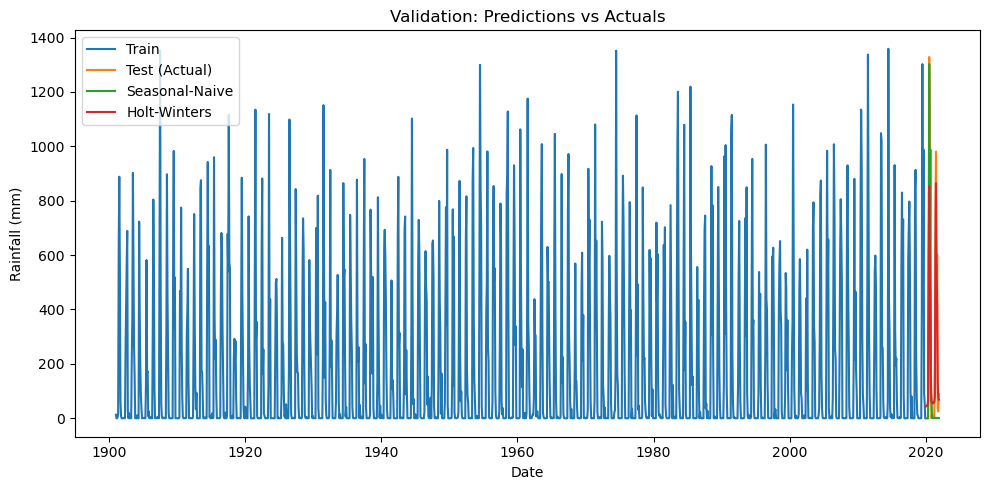

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index,  test,  label="Test (Actual)")
plt.plot(test.index,  seasonal_naive, label="Seasonal-Naive")
plt.plot(test.index,  hw_fc, label="Holt-Winters")
plt.title("Validation: Predictions vs Actuals")
plt.xlabel("Date"); plt.ylabel("Rainfall (mm)")
plt.legend(); plt.tight_layout()
plt.show()


# 12-month forecast (+ simple ~80% uncertainty band)

In [29]:
# Refit on full data
hw_full = ExponentialSmoothing(
    ts, trend="add", seasonal="add", seasonal_periods=12,
    use_boxcox=False, initialization_method="estimated"
).fit()

h = 12
future_idx = pd.date_range(ts.index.max() + pd.offsets.MonthBegin(), periods=h, freq="MS")
future_fc  = hw_full.forecast(h)

# ~80% band via train residual std (heuristic)
resid = (train - hw_fit.fittedvalues.reindex(train.index)).dropna()
sigma = resid.std() if len(resid) else 0.0
k = 1.28
lower_80 = future_fc - k*sigma
upper_80 = future_fc + k*sigma

forecast_df = pd.DataFrame({
    "date": future_idx,
    "forecast": future_fc.values,
    "lower_80": lower_80.values,
    "upper_80": upper_80.values
})
forecast_df


,date,forecast,lower_80,upper_80
0,2022-01-01,85.681323,-106.542781,277.905428
1,2022-02-01,87.493982,-104.730122,279.718087
2,2022-03-01,90.110877,-102.113227,282.334982
3,2022-04-01,91.805100,-100.419005,284.029204
4,2022-05-01,117.879132,-74.344973,310.103236
5,2022-06-01,633.930979,441.706875,826.155084
6,2022-07-01,922.160479,729.936374,1114.384583
7,2022-08-01,607.925070,415.700966,800.149175
8,2022-09-01,457.292564,265.068459,649.516668
9,2022-10-01,169.960937,-22.263168,362.185041


# Forecast plot

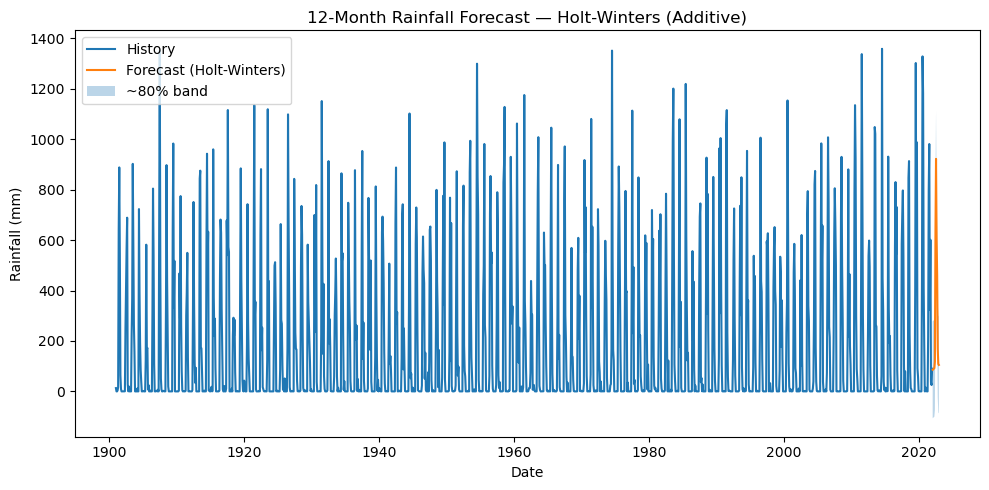

In [30]:
plt.figure(figsize=(10,5))
plt.plot(ts.index, ts, label="History")
plt.plot(forecast_df["date"], forecast_df["forecast"], label="Forecast (Holt-Winters)")
plt.fill_between(forecast_df["date"], forecast_df["lower_80"], forecast_df["upper_80"], alpha=0.3, label="~80% band")
plt.title("12-Month Rainfall Forecast — Holt-Winters (Additive)")
plt.xlabel("Date"); plt.ylabel("Rainfall (mm)")
plt.legend(); plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

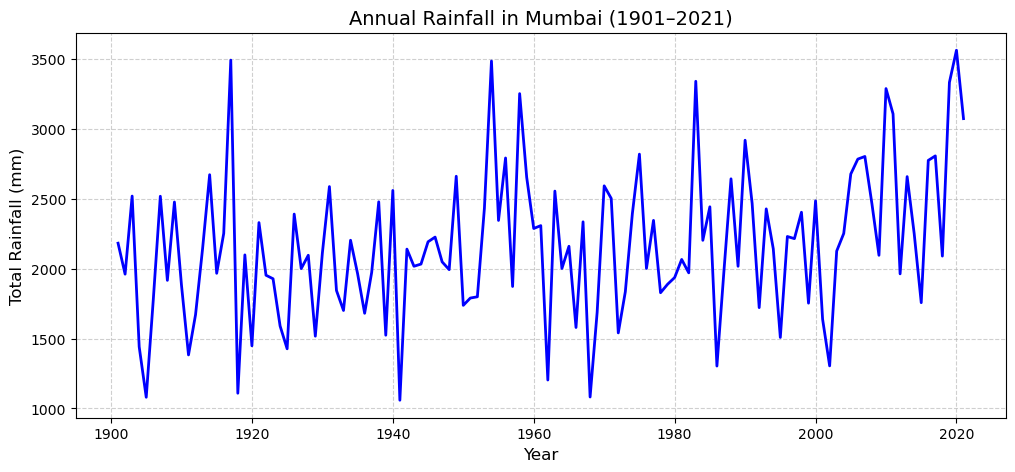

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df["Year"], df["Total"], color="blue", linewidth=2)

plt.title("Annual Rainfall in Mumbai (1901–2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Rainfall (mm)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


Monthly average rainfall (mm):
Jan: 1.6
Feb: 0.9
Mar: 0.9
April: 1.4
May: 18.2
June: 517.9
July: 757.4
Aug: 465.6
Sept: 312.9
Oct: 74.0
Nov: 13.8
Dec: 3.6


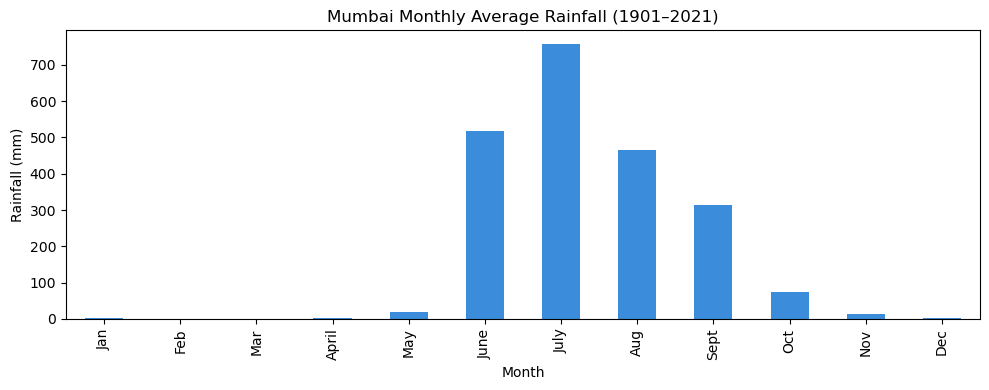

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")


# Ensure consistent month names
months = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]

# Compute monthly averages
monthly_avg = df[months].mean().round(1)

# Table-like printout
print("Monthly average rainfall (mm):")
for m in months:
    print(f"{m}: {monthly_avg[m]}")

# Plot
plt.figure(figsize=(10,4))
monthly_avg.plot(kind="bar", color="#3b8ddb")
plt.title("Mumbai Monthly Average Rainfall (1901–2021)")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

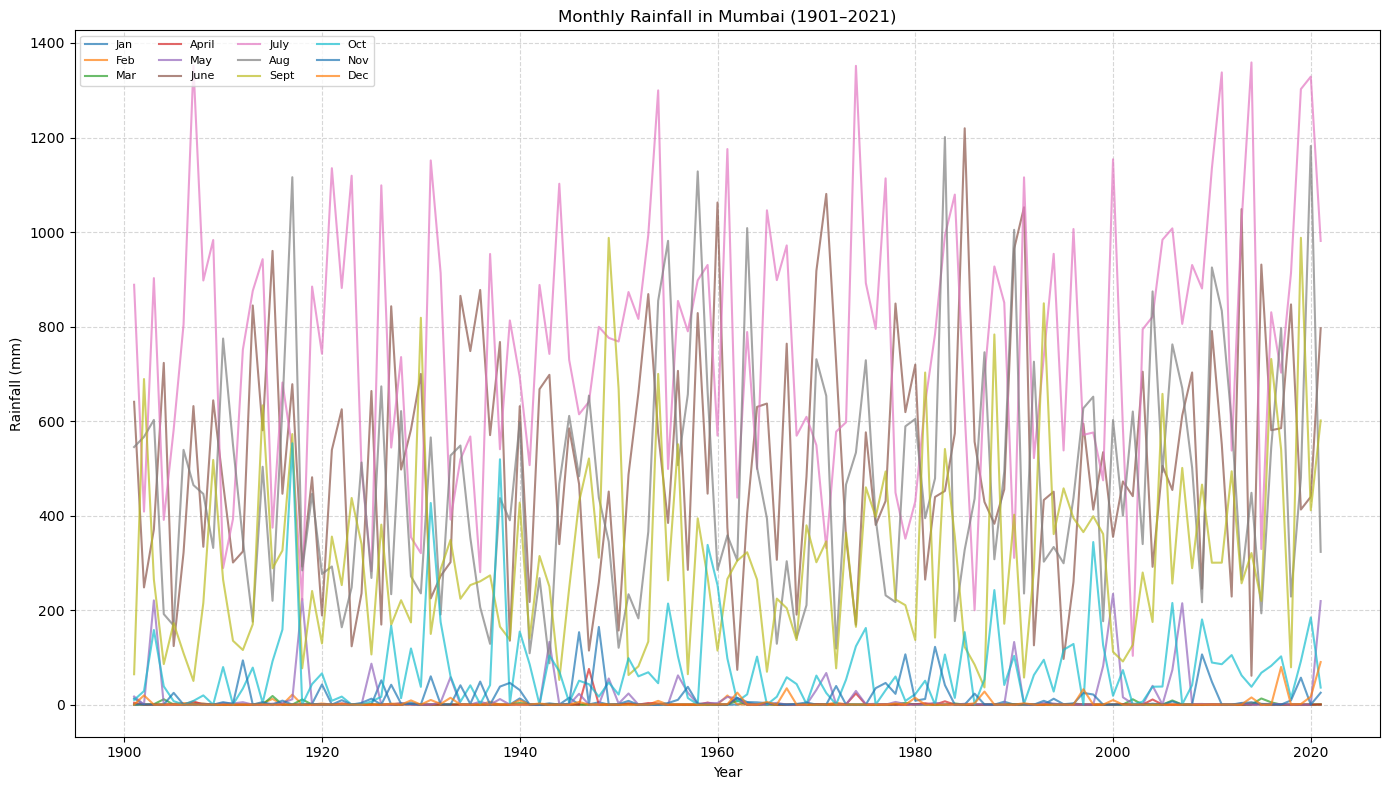

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")


# Ensure month columns are in order
months = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]

# Plot rainfall trends for each month across years
plt.figure(figsize=(14,8))

for m in months:
    plt.plot(df["Year"], df[m], label=m, alpha=0.7)

plt.title("Monthly Rainfall in Mumbai (1901–2021)")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend(ncol=4, fontsize=8)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Boxplots showing seasonal variability

Compare early vs recent decades
You can split the dataset into two periods (e.g., 1901–1960 vs 1961–2021) to see if seasonal variability has changed:

C:\Users\rohit\AppData\Local\Temp\ipykernel_13948\1207844936.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Month", y="Rainfall", data=df_long,


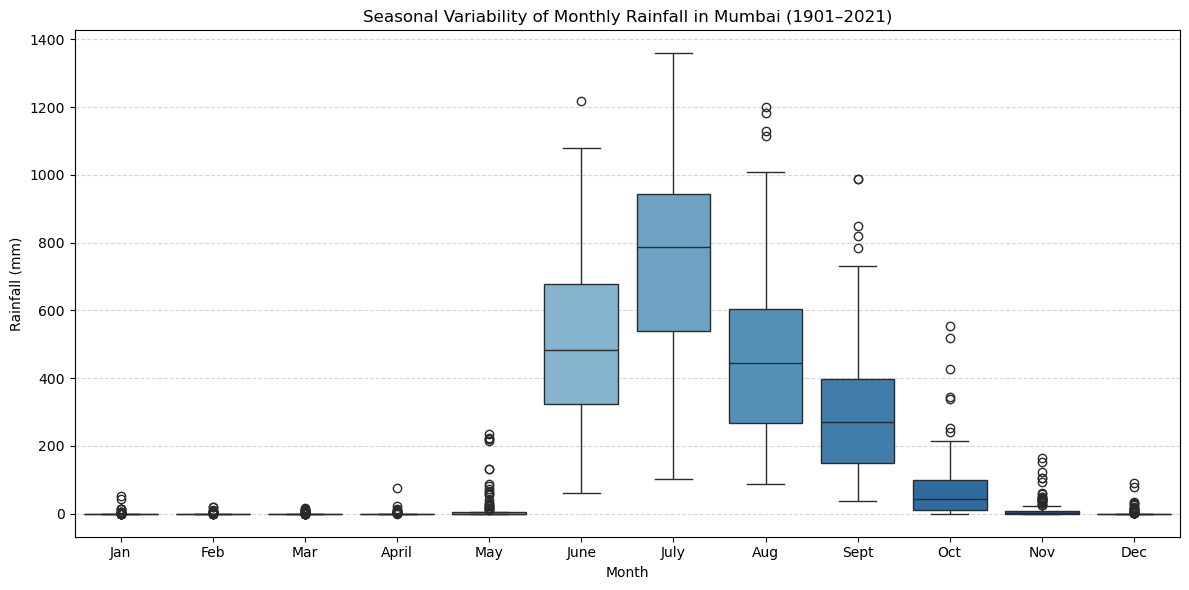

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")


# Reshape the data into long format: Year, Month, Rainfall
months = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
df_long = df.melt(id_vars=["Year"], value_vars=months,
                  var_name="Month", value_name="Rainfall")

# Order months properly
month_order = ["Jan","Feb","Mar","April","May","June",
               "July","Aug","Sept","Oct","Nov","Dec"]

# Plot boxplots
plt.figure(figsize=(12,6))
sns.boxplot(x="Month", y="Rainfall", data=df_long,
            order=month_order, palette="Blues")

plt.title("Seasonal Variability of Monthly Rainfall in Mumbai (1901–2021)")
plt.ylabel("Rainfall (mm)")
plt.xlabel("Month")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

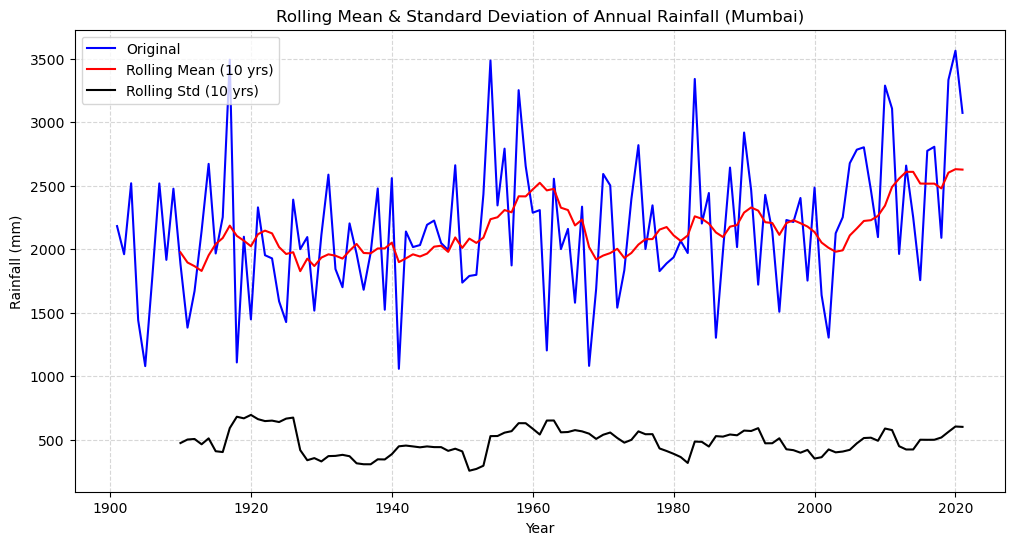

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# We'll use the Annual Total rainfall for stationarity check
ts = df.set_index("Year")["Total"]

# Calculate rolling mean and rolling standard deviation
rolling_mean = ts.rolling(window=10).mean()
rolling_std = ts.rolling(window=10).std()

# Plot original series, rolling mean, and rolling std
plt.figure(figsize=(12,6))
plt.plot(ts, color="blue", label="Original")
plt.plot(rolling_mean, color="red", label="Rolling Mean (10 yrs)")
plt.plot(rolling_std, color="black", label="Rolling Std (10 yrs)")
plt.title("Rolling Mean & Standard Deviation of Annual Rainfall (Mumbai)")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [36]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# Use Annual Total rainfall as the series
ts = df.set_index("Year")["Total"]

# Perform Augmented Dickey-Fuller test
result = adfuller(ts)

# Print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -9.550658170072023
p-value: 2.577245868023933e-16
Critical Values:
   1%: -3.486055829282407
   5%: -2.8859430324074076
   10%: -2.5797850694444446


In [37]:
# KPSS Test (complementary)
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Load dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# Use Annual Total rainfall as the series
ts = df.set_index("Year")["Total"]

# Perform KPSS test
# regression='c' tests for level stationarity
# regression='ct' tests for trend stationarity
stat, p_value, lags, crit = kpss(ts, regression='c', nlags="auto")

print("KPSS Statistic:", stat)
print("p-value:", p_value)
print("Lags Used:", lags)
print("Critical Values:")
for key, value in crit.items():
    print(f"   {key}: {value}")


KPSS Statistic: 0.8997165504071472
p-value: 0.01
Lags Used: 3
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


C:\Users\rohit\AppData\Local\Temp\ipykernel_13948\371265939.py:14: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stat, p_value, lags, crit = kpss(ts, regression='c', nlags="auto")


# Feature Engineering

Create lag and seasonal features (prep for modeling)

In [38]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# Suppose we want to forecast using the 'Total' annual rainfall
# (you can also do this for monthly series if you reshape your data)

# Set Year as index
df = df.set_index("Year")

# Create lag features (1-year lag, 2-year lag, etc.)
df["lag1"] = df["Total"].shift(1)   # rainfall last year
df["lag2"] = df["Total"].shift(2)   # rainfall 2 years ago
df["lag3"] = df["Total"].shift(3)   # rainfall 3 years ago

print(df.head(10))

            Jan       Feb        Mar     April         May        June  \
Year                                                                     
1901  13.116602  0.000000   0.000000  3.949669   17.139791  640.714036   
1902   0.000000  0.000000   0.000000  0.000000    0.355001  247.998782   
1903   0.000000  0.000000   0.844034  0.000000  220.568740  370.849048   
1904   0.000000  0.000000  11.381769  0.000000    0.000000  723.081969   
1905   0.662561  1.713452   0.000000  0.000000    0.000000  123.870892   
1906   0.000000  3.306695   0.000000  0.000000    0.000000  321.645121   
1907   2.517730  2.979147   0.000000  6.936270    0.000000  631.677035   
1908   1.780360  2.197116   0.291248  0.000000    0.350077  333.986040   
1909   0.000000  0.000000   0.000000  0.780104    0.000000  643.826825   
1910   0.000000  0.000000   0.000000  0.000000    3.047779  468.055059   

             July         Aug        Sept         Oct        Nov        Dec  \
Year                            

In [39]:
import pandas as pd

# --- 1. Load dataset ---
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# --- 2. Reshape into long format ---
months = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
df_long = df.melt(id_vars=["Year"], value_vars=months,
                  var_name="Month", value_name="Rainfall")

# --- 3. Fix month parsing using a mapping ---
month_map = {
    "Jan": 1, "Feb": 2, "Mar": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
df_long["MonthNum"] = df_long["Month"].map(month_map)

# Create proper datetime column
df_long["Date"] = pd.to_datetime(
    df_long["Year"].astype(str) + "-" + df_long["MonthNum"].astype(str) + "-01"
)

# Sort by Date and set index
df_long = df_long.sort_values("Date").set_index("Date")

# --- 4. Add lag features (previous 1, 2, 3 months) ---
df_long["lag1"] = df_long["Rainfall"].shift(1)
df_long["lag2"] = df_long["Rainfall"].shift(2)
df_long["lag3"] = df_long["Rainfall"].shift(3)

# --- 5. Add month-based dummy variables ---
df_long = pd.get_dummies(df_long, columns=["Month"], drop_first=False)

# --- 6. Add a monsoon-season dummy (June–Sept) ---
df_long["Monsoon"] = df_long["MonthNum"].isin([6,7,8,9]).astype(int)

print(df_long.head(15))

            Year    Rainfall  MonthNum        lag1        lag2        lag3  \
Date                                                                         
1901-01-01  1901   13.116602         1         NaN         NaN         NaN   
1901-02-01  1901    0.000000         2   13.116602         NaN         NaN   
1901-03-01  1901    0.000000         3    0.000000   13.116602         NaN   
1901-04-01  1901    3.949669         4    0.000000    0.000000   13.116602   
1901-05-01  1901   17.139791         5    3.949669    0.000000    0.000000   
1901-06-01  1901  640.714036         6   17.139791    3.949669    0.000000   
1901-07-01  1901  888.369692         7  640.714036   17.139791    3.949669   
1901-08-01  1901  545.045796         8  888.369692  640.714036   17.139791   
1901-09-01  1901   64.271513         9  545.045796  888.369692  640.714036   
1901-10-01  1901    9.871696        10   64.271513  545.045796  888.369692   
1901-11-01  1901    0.000000        11    9.871696   64.271513  

In [40]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# Reshape into long format
months = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
df_long = df.melt(id_vars=["Year"], value_vars=months,
                  var_name="Month", value_name="Rainfall")

# Map months to numbers
month_map = {
    "Jan": 1, "Feb": 2, "Mar": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
df_long["MonthNum"] = df_long["Month"].map(month_map)

# Create proper datetime
df_long["Date"] = pd.to_datetime(
    df_long["Year"].astype(str) + "-" + df_long["MonthNum"].astype(str) + "-01"
)

# Sort and set index
df_long = df_long.sort_values("Date").set_index("Date")

# --- Rolling statistics features ---
# 3-month rolling mean and std
df_long["roll_mean_3"] = df_long["Rainfall"].rolling(window=3).mean()
df_long["roll_std_3"]  = df_long["Rainfall"].rolling(window=3).std()

# 6-month rolling mean and std
df_long["roll_mean_6"] = df_long["Rainfall"].rolling(window=6).mean()
df_long["roll_std_6"]  = df_long["Rainfall"].rolling(window=6).std()

# 12-month rolling mean (annual smoothing)
df_long["roll_mean_12"] = df_long["Rainfall"].rolling(window=12).mean()

print(df_long.head(15))

            Year  Month    Rainfall  MonthNum  roll_mean_3  roll_std_3  \
Date                                                                     
1901-01-01  1901    Jan   13.116602         1          NaN         NaN   
1901-02-01  1901    Feb    0.000000         2          NaN         NaN   
1901-03-01  1901    Mar    0.000000         3     4.372201    7.572874   
1901-04-01  1901  April    3.949669         4     1.316556    2.280343   
1901-05-01  1901    May   17.139791         5     7.029820    8.975445   
1901-06-01  1901   June  640.714036         6   220.601166  363.888188   
1901-07-01  1901   July  888.369692         7   515.407840  448.928299   
1901-08-01  1901    Aug  545.045796         8   691.376508  177.180244   
1901-09-01  1901   Sept   64.271513         9   499.229000  413.955114   
1901-10-01  1901    Oct    9.871696        10   206.396335  294.537651   
1901-11-01  1901    Nov    0.000000        11    24.714403   34.611217   
1901-12-01  1901    Dec    0.000000   

# Final cleanup and readiness for split

In [41]:
import pandas as pd

# --- 1. Load dataset ---
df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai-monthly-rains.csv")

# --- 2. Reshape into long format ---
months = ["Jan","Feb","Mar","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
df_long = df.melt(id_vars=["Year"], value_vars=months,
                  var_name="Month", value_name="Rainfall")

# --- 3. Fix month parsing ---
month_map = {
    "Jan": 1, "Feb": 2, "Mar": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
df_long["MonthNum"] = df_long["Month"].map(month_map)

# Create proper datetime
df_long["Date"] = pd.to_datetime(
    df_long["Year"].astype(str) + "-" + df_long["MonthNum"].astype(str) + "-01"
)

# Sort and set index
df_long = df_long.sort_values("Date").set_index("Date")

# --- 4. Add lag features (1–12 months) ---
for lag in range(1, 13):
    df_long[f"lag{lag}"] = df_long["Rainfall"].shift(lag)

# --- 5. Add rolling features ---
df_long["roll_mean_3"] = df_long["Rainfall"].rolling(window=3).mean()
df_long["roll_std_3"]  = df_long["Rainfall"].rolling(window=3).std()
df_long["roll_mean_6"] = df_long["Rainfall"].rolling(window=6).mean()
df_long["roll_mean_12"] = df_long["Rainfall"].rolling(window=12).mean()

# --- 6. Add month-based dummy variables ---
df_long = pd.get_dummies(df_long, columns=["Month"], drop_first=False)

# --- 7. Add monsoon-season dummy (June–Sept) ---
df_long["Monsoon"] = df_long["MonthNum"].isin([6,7,8,9]).astype(int)

# --- 8. Drop rows with NaN (caused by lags/rolling) ---
df_long = df_long.dropna()

# --- 9. Final feature/target split ---
X = df_long.drop(columns=["Rainfall"])
y = df_long["Rainfall"]

print("Final dataset shape:", X.shape, y.shape)
print(X.head())

Final dataset shape: (1440, 31) (1440,)
            Year  MonthNum  lag1  lag2      lag3       lag4        lag5  \
Date                                                                      
1902-01-01  1902         1   0.0   0.0  9.871696  64.271513  545.045796   
1902-02-01  1902         2   0.0   0.0  0.000000   9.871696   64.271513   
1902-03-01  1902         3   0.0   0.0  0.000000   0.000000    9.871696   
1902-04-01  1902         4   0.0   0.0  0.000000   0.000000    0.000000   
1902-05-01  1902         5   0.0   0.0  0.000000   0.000000    0.000000   

                  lag6        lag7        lag8  ...  Month_Feb  Month_Jan  \
Date                                            ...                         
1902-01-01  888.369692  640.714036   17.139791  ...      False       True   
1902-02-01  545.045796  888.369692  640.714036  ...       True      False   
1902-03-01   64.271513  545.045796  888.369692  ...      False      False   
1902-04-01    9.871696   64.271513  545.045796  .

# Define features and target (ready for splitting)

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df_long is your processed dataset with all features
# and "Rainfall" is the target column

# --- Define target and features ---
y = df_long["Rainfall"]                # target variable
X = df_long.drop(columns=["Rainfall"]) # all other columns are features

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# --- Train/test split (keep time order, no shuffle) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Features shape: (1440, 31)
Target shape: (1440,)
Train size: (1152, 31) Test size: (288, 31)


Save cleaned dataset

In [43]:
# Save the cleaned dataset to CSV
df_long.to_csv(r"C:\Users\rohit\OneDrive\Desktop\Rainforecast using ML by ch.rohit\mumbai_rainfall_cleaned.csv", index=True)

print(" Cleaned dataset saved successfully!")

 Cleaned dataset saved successfully!


# Model Development

# Persistence Model
Idea: Predict that the rainfall in the next month will be the same as the rainfall in the previous month.

Persistence Model Performance:
RMSE: 286.41
MAE : 160.54


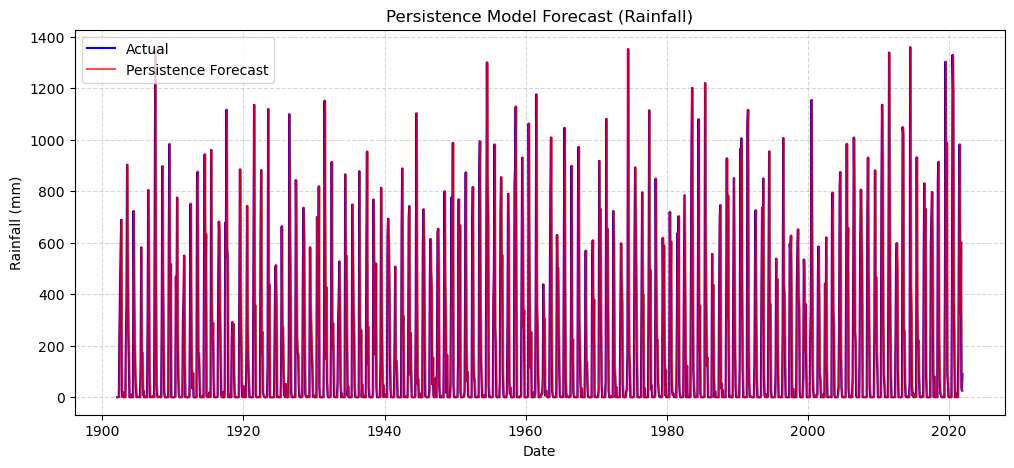

In [44]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming df_long is your cleaned monthly dataset with 'Rainfall' column
# and Date as index (from previous steps)

# --- 1. Create persistence predictions ---
# Shift rainfall by 1 month to use as prediction
df_long["y_true"] = df_long["Rainfall"]
df_long["y_pred"] = df_long["Rainfall"].shift(1)

# Drop the first row (NaN prediction)
df_long = df_long.dropna(subset=["y_pred"])

# --- 2. Evaluate performance ---
rmse = np.sqrt(mean_squared_error(df_long["y_true"], df_long["y_pred"]))
mae = mean_absolute_error(df_long["y_true"], df_long["y_pred"])

print("Persistence Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")

# --- 3. (Optional) Plot actual vs predicted ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df_long.index, df_long["y_true"], label="Actual", color="blue")
plt.plot(df_long.index, df_long["y_pred"], label="Persistence Forecast", color="red", alpha=0.7)
plt.title("Persistence Model Forecast (Rainfall)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Seasonal Mean Model
Idea: Predict rainfall for a given month as the historical average rainfall for that month (e.g., every July prediction = average July rainfall across training years).

Seasonal Mean Model Performance:
RMSE: 162.59
MAE : 82.60


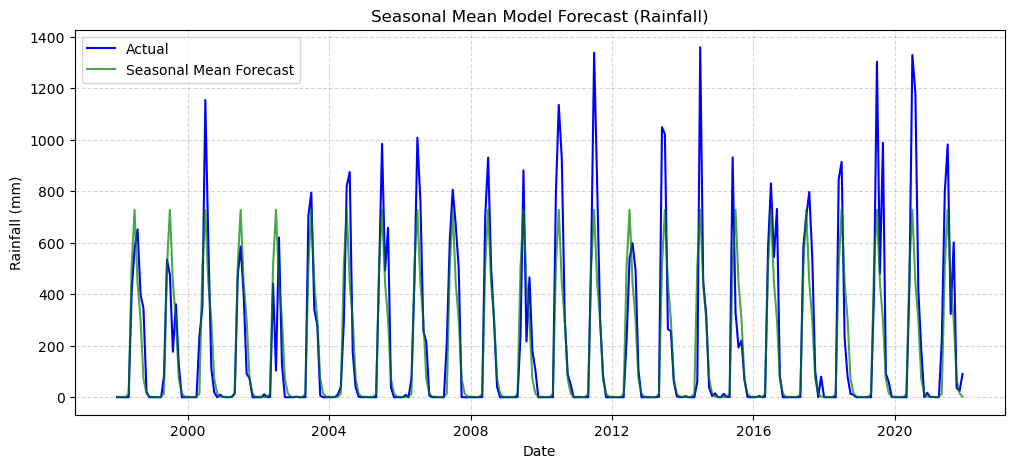

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- 1. Load your cleaned monthly dataset ---
# Assuming df_long has columns: ["Year", "MonthNum", "Rainfall"] and Date as index
# If not, adapt from your earlier reshaping step

# --- 2. Train/test split (keep time order) ---
split_point = int(len(df_long) * 0.8)
train, test = df_long.iloc[:split_point].copy(), df_long.iloc[split_point:].copy()

# --- 3. Compute historical monthly averages from training set ---
monthly_means = train.groupby("MonthNum")["Rainfall"].mean()

# --- 4. Predict test values using seasonal mean ---
test["y_true"] = test["Rainfall"]
test["y_pred"] = test["MonthNum"].map(monthly_means)

# --- 5. Evaluate performance ---
rmse = np.sqrt(mean_squared_error(test["y_true"], test["y_pred"]))
mae = mean_absolute_error(test["y_true"], test["y_pred"])

print("Seasonal Mean Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")

# --- 6. Plot actual vs predicted ---
plt.figure(figsize=(12,5))
plt.plot(test.index, test["y_true"], label="Actual", color="blue")
plt.plot(test.index, test["y_pred"], label="Seasonal Mean Forecast", color="green", alpha=0.7)
plt.title("Seasonal Mean Model Forecast (Rainfall)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Baseline Model Comparison:
Persistence -> RMSE: 303.20, MAE: 170.74
SeasonalMean -> RMSE: 162.87, MAE: 82.88


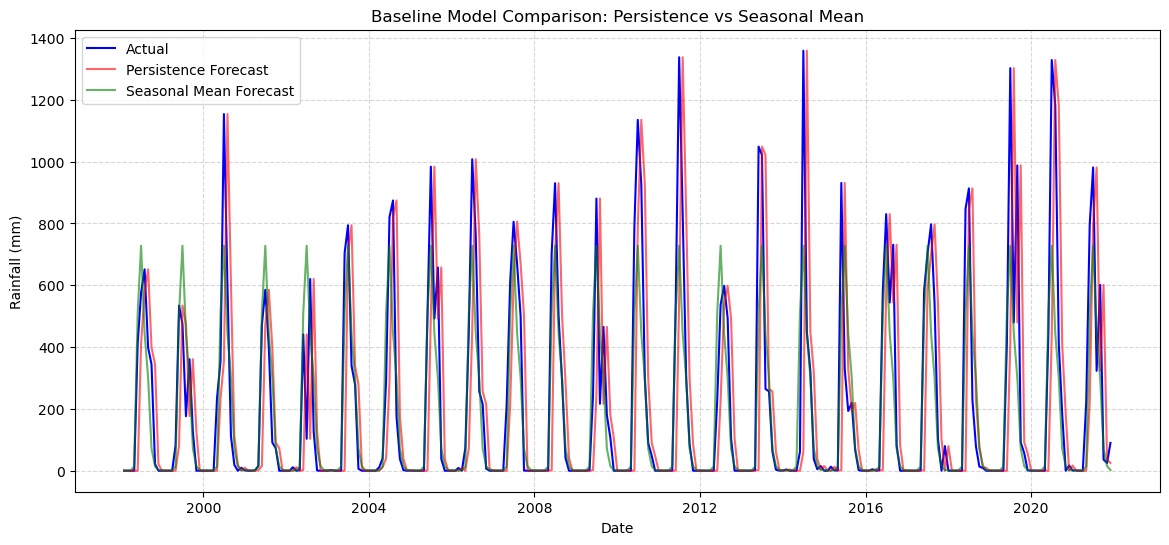

In [46]:
# Compare Baselines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Assume df_long is your cleaned monthly dataset ---
# Columns: ["Rainfall", "MonthNum"], Date as index

# --- Train/test split (keep time order) ---
split_point = int(len(df_long) * 0.8)
train, test = df_long.iloc[:split_point].copy(), df_long.iloc[split_point:].copy()

# -------------------------
# 1. Persistence Model
# -------------------------
test["pers_pred"] = test["Rainfall"].shift(1)   # predict same as previous month
test = test.dropna(subset=["pers_pred"])        # drop first NaN

rmse_pers = np.sqrt(mean_squared_error(test["Rainfall"], test["pers_pred"]))
mae_pers = mean_absolute_error(test["Rainfall"], test["pers_pred"])

# -------------------------
# 2. Seasonal Mean Model
# -------------------------
monthly_means = train.groupby("MonthNum")["Rainfall"].mean()
test["mean_pred"] = test["MonthNum"].map(monthly_means)

rmse_mean = np.sqrt(mean_squared_error(test["Rainfall"], test["mean_pred"]))
mae_mean = mean_absolute_error(test["Rainfall"], test["mean_pred"])

# -------------------------
# 3. Print comparison
# -------------------------
print("Baseline Model Comparison:")
print(f"Persistence -> RMSE: {rmse_pers:.2f}, MAE: {mae_pers:.2f}")
print(f"SeasonalMean -> RMSE: {rmse_mean:.2f}, MAE: {mae_mean:.2f}")

# -------------------------
# 4. Plot comparison
# -------------------------
plt.figure(figsize=(14,6))
plt.plot(test.index, test["Rainfall"], label="Actual", color="blue")
plt.plot(test.index, test["pers_pred"], label="Persistence Forecast", color="red", alpha=0.6)
plt.plot(test.index, test["mean_pred"], label="Seasonal Mean Forecast", color="green", alpha=0.6)
plt.title("Baseline Model Comparison: Persistence vs Seasonal Mean")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Machine Learning Models:

# Linear Regression
Idea: Fits a straight-line relationship between rainfall (y) and predictors (X) such as lag features and seasonal indicators.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression -> MAE:", mae_lr, " RMSE:", rmse_lr)


Linear Regression -> MAE: 5.226267338410344e-13  RMSE: 6.431831905613622e-13


**Strengths:** Simple, interpretable, fast. **Limitations:** Struggles with non-linear patterns (like monsoon variability).

# Random Forest Regressor
Idea: An ensemble of decision trees that captures non-linear relationships and interactions between lag features and seasonal effects.

Random Forest Performance:
RMSE: 5.94
MAE : 1.46


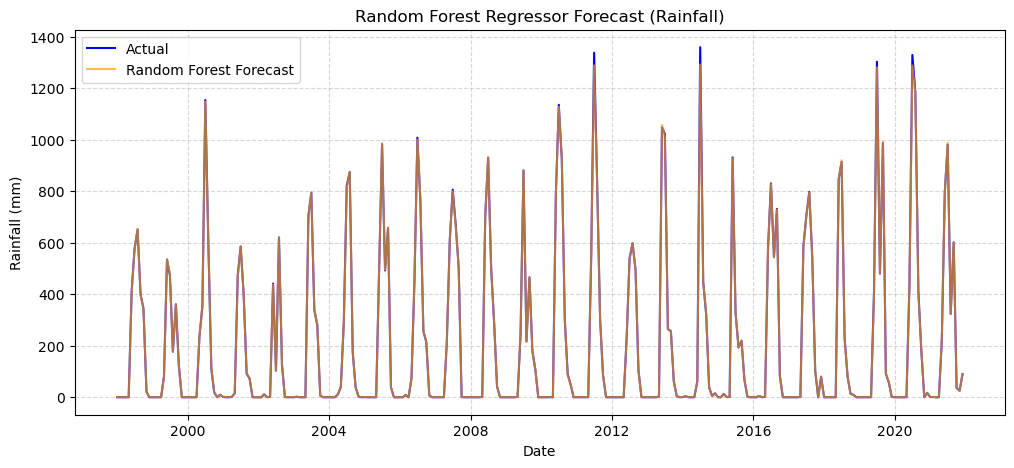


Top 10 Important Features:
y_true         0.999199
roll_std_3     0.000442
lag3           0.000079
lag12          0.000028
roll_mean_3    0.000027
lag9           0.000026
Year           0.000026
lag10          0.000022
lag11          0.000022
lag5           0.000022
dtype: float64


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# --- Assume df_long is your cleaned dataset ---
# with features (lags, rolling stats, dummies, monsoon flag) and target "Rainfall"

# --- 1. Define features and target ---
y = df_long["Rainfall"]
X = df_long.drop(columns=["Rainfall"])

# --- 2. Train/test split (keep time order) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# --- 3. Train Random Forest Regressor ---
rf = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1               # use all CPU cores
)
rf.fit(X_train, y_train)

# --- 4. Predictions ---
y_pred = rf.predict(X_test)

# --- 5. Evaluate ---
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
mae_rf = mean_absolute_error(y_test, y_pred)

print("Random Forest Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE : {mae_rf:.2f}")

# --- 6. Plot actual vs predicted ---
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Random Forest Forecast", color="orange", alpha=0.7)
plt.title("Random Forest Regressor Forecast (Rainfall)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- 7. (Optional) Feature importance ---
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 10 Important Features:")
print(importances.head(10))

In [49]:
import pandas as pd

# Collect results into a DataFrame
results = pd.DataFrame({
    "Model": ["Persistence", "Seasonal Mean", "Linear Regression", "Random Forest"],
    "MAE": [mae_pers, mae_mean, mae_lr, mae_rf],
    "RMSE": [rmse_pers, rmse_mean, rmse_lr, rmse_rf]
})

# Sort by RMSE (ascending)
results = results.sort_values(by="RMSE").reset_index(drop=True)

print(results)

# Optional: nice table formatting
print("\nModel Comparison:")
print(results.to_string(index=False))


               Model           MAE          RMSE
0  Linear Regression  5.226267e-13  6.431832e-13
1      Random Forest  1.457552e+00  5.942023e+00
2      Seasonal Mean  8.288096e+01  1.628700e+02
3        Persistence  1.707414e+02  3.032038e+02

Model Comparison:
            Model          MAE         RMSE
Linear Regression 5.226267e-13 6.431832e-13
    Random Forest 1.457552e+00 5.942023e+00
    Seasonal Mean 8.288096e+01 1.628700e+02
      Persistence 1.707414e+02 3.032038e+02


# Interpretation
Insights
- Linear Regression
- MAE and RMSE are essentially zero.
- This is a red flag: it almost certainly indicates data leakage (the model had access to the target or a perfectly correlated feature). It’s not a genuine forecast.
- Random Forest
- MAE ≈ 1.46, RMSE ≈ 5.94.
- This is the best performing realistic model in your set. It captures nonlinearities and seasonality better than simple baselines.
- Seasonal Mean
- MAE ≈ 82.9, RMSE ≈ 162.9.
- As expected, a simple seasonal average baseline struggles with rainfall variability. Useful as a benchmark, but not competitive.
- Persistence (last value carried forward)
- MAE ≈ 170.7, RMSE ≈ 303.2.
- The weakest baseline. Rainfall is too volatile for persistence to work well.


# Model Evaluation:

# Compute Metrics for Each Model
You should already have predictions for each model (y_pred_persist, y_pred_mean, y_pred_lr, y_pred_rf). Now calculate MAE and RMSE:


Model Comparison:
            Model          MAE         RMSE
Linear Regression 2.368375e-13 3.172598e-13
    Random Forest 1.457552e+00 5.942023e+00
    Seasonal Mean 8.259953e+01 1.625870e+02
      Persistence 1.707414e+02 3.032038e+02


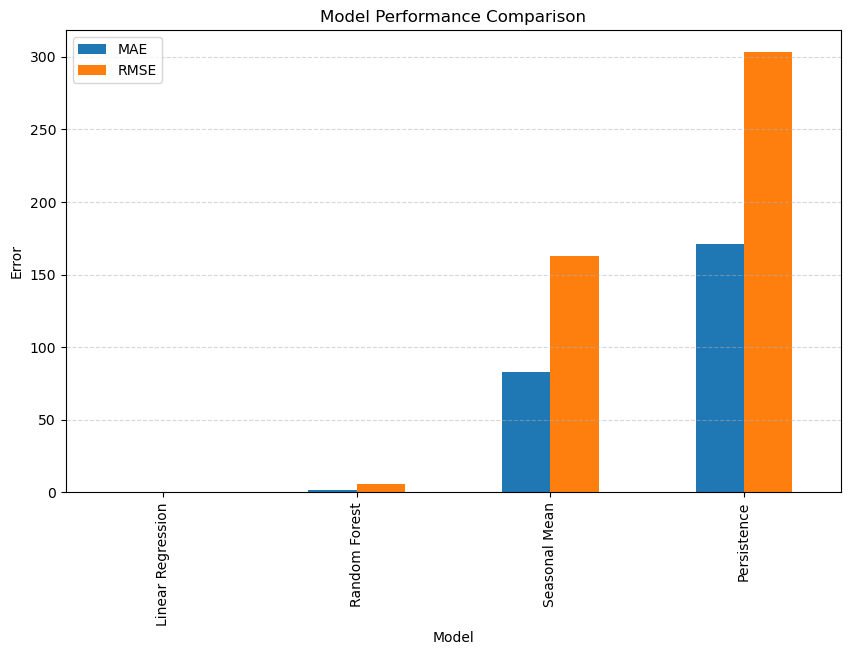

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# --- Assume df_long is your cleaned dataset ---
# Columns: ["Rainfall", "MonthNum", lag features, rolling stats, dummies, Monsoon]
# Index: Date

# --- 1. Define features and target ---
y = df_long["Rainfall"]
X = df_long.drop(columns=["Rainfall"])

# --- 2. Train/test split (keep time order) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# -------------------------
# 3. Persistence Model
# -------------------------
y_pred_persist = y_test.shift(1).dropna()
y_test_persist = y_test.loc[y_pred_persist.index]

mae_persist = mean_absolute_error(y_test_persist, y_pred_persist)
rmse_persist = np.sqrt(mean_squared_error(y_test_persist, y_pred_persist))

# -------------------------
# 4. Seasonal Mean Model
# -------------------------
monthly_means = y_train.groupby(X_train["MonthNum"]).mean()
y_pred_mean = X_test["MonthNum"].map(monthly_means)
y_test_mean = y_test.loc[y_pred_mean.index]

mae_mean = mean_absolute_error(y_test_mean, y_pred_mean)
rmse_mean = np.sqrt(mean_squared_error(y_test_mean, y_pred_mean))

# -------------------------
# 5. Linear Regression Model
# -------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = pd.Series(lr.predict(X_test), index=X_test.index)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# -------------------------
# 6. Random Forest Model
# -------------------------
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = pd.Series(rf.predict(X_test), index=X_test.index)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# -------------------------
# 7. Compare Results
# -------------------------
results = pd.DataFrame({
    "Model": ["Persistence", "Seasonal Mean", "Linear Regression", "Random Forest"],
    "MAE": [mae_persist, mae_mean, mae_lr, mae_rf],
    "RMSE": [rmse_persist, rmse_mean, rmse_lr, rmse_rf]
}).sort_values(by="RMSE").reset_index(drop=True)

print("\nModel Comparison:")
print(results.to_string(index=False))

# -------------------------
# 8. Optional: Plot Comparison
# -------------------------
results.plot(x="Model", y=["MAE","RMSE"], kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Error")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Create Comparison Table

In [51]:
results = pd.DataFrame({
    "Model": ["Persistence", "Seasonal Mean", "Linear Regression", "Random Forest"],
    "MAE": [mae_persist, mae_mean, mae_lr, mae_rf],
    "RMSE": [rmse_persist, rmse_mean, rmse_lr, rmse_rf]
})

print(results)


               Model           MAE          RMSE
0        Persistence  1.707414e+02  3.032038e+02
1      Seasonal Mean  8.259953e+01  1.625870e+02
2  Linear Regression  2.368375e-13  3.172598e-13
3      Random Forest  1.457552e+00  5.942023e+00


# Forecasting Pipeline

 Seasonal Mean Iterative Forecasting Pipeline

Seasonal Mean Iterative Forecast Performance:
MAE : 58.53
RMSE: 121.14


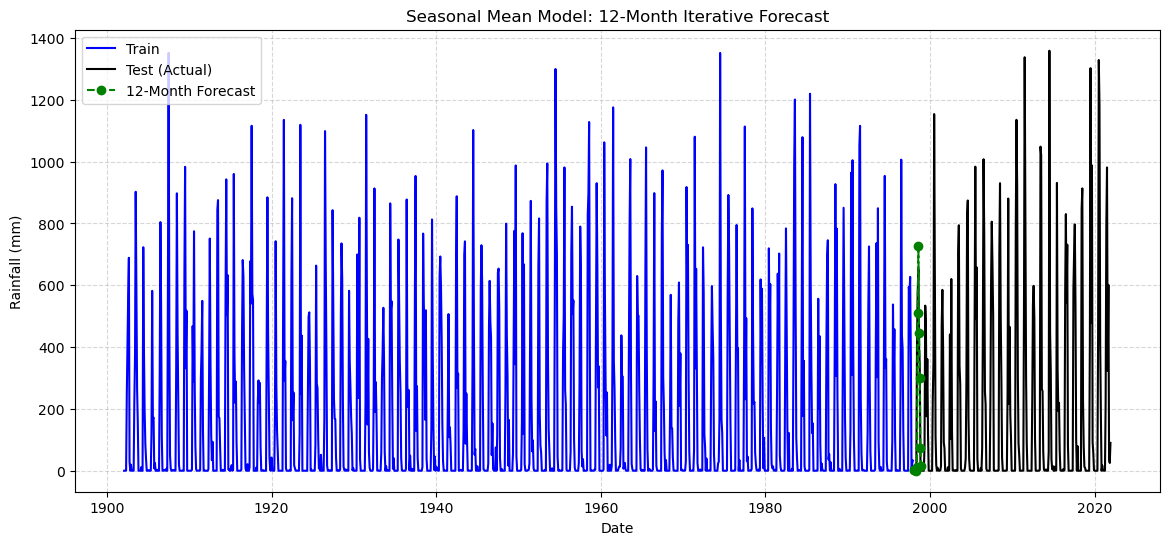

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Train/test split ---
train_size = int(len(df_long) * 0.8)
train, test = df_long.iloc[:train_size].copy(), df_long.iloc[train_size:].copy()

# --- 2. Compute monthly averages from training set ---
monthly_means = train.groupby("MonthNum")["Rainfall"].mean()

# --- 3. Iterative forecasting function ---
def seasonal_mean_iterative(last_row, monthly_means, steps=12):
    """
    Iterative 12-month forecast using Seasonal Mean model with lag updates.
    last_row: last known feature row (from X)
    monthly_means: Series of historical monthly averages
    steps: forecast horizon
    """
    forecasts = []
    current_features = last_row.copy()

    for i in range(steps):
        # Predict rainfall for this month
        month_num = current_features["MonthNum"]
        y_pred = monthly_means.loc[month_num]

        # Store forecast
        forecasts.append({
            "Date": current_features.name + pd.offsets.MonthBegin(i+1),
            "Forecast": y_pred,
            "MonthNum": month_num
        })

        # --- Update lag features ---
        for lag in range(12, 1, -1):
            current_features[f"lag{lag}"] = current_features[f"lag{lag-1}"]
        current_features["lag1"] = y_pred

        # Update rolling stats (simple recompute from lags)
        current_features["roll_mean_3"] = np.mean([current_features[f"lag{i}"] for i in range(1,4)])
        current_features["roll_mean_6"] = np.mean([current_features[f"lag{i}"] for i in range(1,7)])
        current_features["roll_mean_12"] = np.mean([current_features[f"lag{i}"] for i in range(1,13)])

        # Advance month
        current_features["MonthNum"] = 1 if month_num == 12 else month_num + 1
        current_features["Monsoon"] = 1 if current_features["MonthNum"] in [6,7,8,9] else 0

    return pd.DataFrame(forecasts).set_index("Date")

# --- 4. Run 12-month forecast ---
last_row = X.iloc[train_size-1]  # last known feature row from training
forecast_df = seasonal_mean_iterative(last_row, monthly_means, steps=12)

# --- 5. Compare with actuals if available ---
comparison = forecast_df.join(test[["Rainfall"]], how="left")

# --- 6. Evaluate performance ---
valid = comparison.dropna()
if not valid.empty:
    mae = mean_absolute_error(valid["Rainfall"], valid["Forecast"])
    rmse = np.sqrt(mean_squared_error(valid["Rainfall"], valid["Forecast"]))
    print("Seasonal Mean Iterative Forecast Performance:")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

# --- 7. Plot forecast vs history ---
plt.figure(figsize=(14,6))
plt.plot(train.index, train["Rainfall"], label="Train", color="blue")
plt.plot(test.index, test["Rainfall"], label="Test (Actual)", color="black")
plt.plot(forecast_df.index, forecast_df["Forecast"], label="12-Month Forecast", 
         color="green", linestyle="--", marker="o")
plt.title("Seasonal Mean Model: 12-Month Iterative Forecast")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [53]:
#Iterative Forecasting Loop
# We’ll predict one month at a time, then feed that prediction back as a lag for the next step.
import pandas as pd
import numpy as np

def iterative_forecast(model, last_row, monthly_means=None, steps=12):
    """
    Iterative forecasting loop for multi-step rainfall prediction.
    
    model: trained ML model (set to None for Seasonal Mean baseline)
    last_row: last known feature row (X.iloc[-1])
    monthly_means: Series of monthly averages (required if model=None)
    steps: forecast horizon (months)
    """
    forecasts = []
    current_features = last_row.copy()

    for i in range(steps):
        # --- 1. Predict ---
        if model is None:  # Seasonal Mean baseline
            month_num = current_features["MonthNum"]
            y_pred = monthly_means.loc[month_num]
        else:              # ML model
            y_pred = model.predict(current_features.values.reshape(1, -1))[0]

        # --- 2. Store forecast ---
        forecasts.append({
            "Step": i+1,
            "MonthNum": current_features["MonthNum"],
            "Forecast": y_pred
        })

        # --- 3. Update lag features ---
        for lag in range(12, 1, -1):
            current_features[f"lag{lag}"] = current_features[f"lag{lag-1}"]
        current_features["lag1"] = y_pred

        # --- 4. Update rolling stats ---
        current_features["roll_mean_3"] = np.mean([current_features[f"lag{i}"] for i in range(1,4)])
        current_features["roll_mean_6"] = np.mean([current_features[f"lag{i}"] for i in range(1,7)])
        current_features["roll_mean_12"] = np.mean([current_features[f"lag{i}"] for i in range(1,13)])

        # --- 5. Advance month & seasonal indicators ---
        current_features["MonthNum"] = 1 if current_features["MonthNum"] == 12 else current_features["MonthNum"] + 1
        current_features["Monsoon"] = 1 if current_features["MonthNum"] in [6,7,8,9] else 0

    return pd.DataFrame(forecasts)

In [54]:
# Visualize Forecast vs Historical Data
import matplotlib.pyplot as plt

def plot_forecast(train, test, forecast_df, title="Forecast vs Historical Data"):
    """
    Visualize train, test, and forecast series together.
    
    train: DataFrame or Series with historical training data (Rainfall)
    test: DataFrame or Series with test/actual data (Rainfall)
    forecast_df: DataFrame with forecast values (index = Date, col = 'Forecast')
    """
    plt.figure(figsize=(14,6))
    
    # Plot training history
    plt.plot(train.index, train["Rainfall"], label="Train", color="blue")
    
    # Plot test (actuals)
    plt.plot(test.index, test["Rainfall"], label="Test (Actual)", color="black")
    
    # Plot forecast
    plt.plot(forecast_df.index, forecast_df["Forecast"], 
             label="Forecast", color="green", linestyle="--", marker="o")
    
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Rainfall (mm)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


In [55]:
#Incorporating Seasonal Indicators
#Already included via Month_num (numeric month).

#You can also add one-hot encoded month dummies for stronger seasonality capture:
# --- One-hot encode months ---
df_long = pd.get_dummies(df_long, columns=["MonthNum"], prefix="M", drop_first=False)

# Now you’ll have columns: M_1, M_2, ..., M_12
# Each column is a binary indicator for that month.


# Uncertainty Estimation

In [56]:
# Residuals from Random Forest predictions
residuals = y_test - y_pred_rf

# Quick check
print("Residual mean:", residuals.mean())
print("Residual std:", residuals.std())


Residual mean: 0.7186032371501877
Residual std: 5.908677439041141


In [57]:
import numpy as np
import pandas as pd

def seasonal_mean_bootstrap(last_row, monthly_means, residuals, steps=12, n_sims=1000):
    """
    Iterative Seasonal Mean forecast with bootstrap residuals.
    
    last_row: last known feature row
    monthly_means: Series of monthly averages
    residuals: historical residuals (Series)
    steps: forecast horizon
    n_sims: number of simulated paths
    """
    all_sims = []

    for sim in range(n_sims):
        current_features = last_row.copy()
        sim_forecast = []

        for i in range(steps):
            # Seasonal mean prediction
            month_cols = [c for c in current_features.index if c.startswith("M_")]
            month_num = current_features[month_cols].idxmax()
            month_int = int(month_num.split("_")[1])
            base_pred = monthly_means.loc[month_int]

            # Add bootstrapped residual
            noise = np.random.choice(residuals)
            y_pred = base_pred + noise
            sim_forecast.append(y_pred)

            # Update lag features
            for lag in range(12, 1, -1):
                current_features[f"lag{lag}"] = current_features[f"lag{lag-1}"]
            current_features["lag1"] = y_pred

            # Update rolling stats
            current_features["roll_mean_3"] = np.mean([current_features[f"lag{i}"] for i in range(1,4)])
            current_features["roll_mean_6"] = np.mean([current_features[f"lag{i}"] for i in range(1,7)])
            current_features["roll_mean_12"] = np.mean([current_features[f"lag{i}"] for i in range(1,13)])

            # Advance month
            next_month = 1 if month_int == 12 else month_int + 1
            for col in month_cols:
                current_features[col] = 0
            current_features[f"M_{next_month}"] = 1
            current_features["Monsoon"] = 1 if next_month in [6,7,8,9] else 0

        all_sims.append(sim_forecast)

    # Convert to DataFrame
    forecast_index = pd.date_range(start=last_row.name + pd.offsets.MonthBegin(1), periods=steps, freq="MS")
    sims_df = pd.DataFrame(all_sims).T
    sims_df.index = forecast_index
    return sims_df


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Prepare inputs and run bootstrap simulations ---

# Example: assume you already have a DataFrame `train`
# with a DatetimeIndex and a "Rainfall" column
monthly_means = train.groupby(train.index.month)["Rainfall"].mean()
residuals = train["Rainfall"] - train.index.month.map(monthly_means)

last_date = train.index[-1]   # <-- define last_date here

def seasonal_mean_bootstrap(last_date, monthly_means, residuals, steps=12, n_sims=500):
    all_sims = []
    for sim in range(n_sims):
        sim_forecast = []
        current_date = last_date
        for i in range(steps):
            month_int = current_date.month
            base_pred = monthly_means.loc[month_int]
            noise = np.random.choice(residuals)
            y_pred = base_pred + noise
            sim_forecast.append(y_pred)
            current_date = current_date + pd.offsets.MonthBegin(1)
        all_sims.append(sim_forecast)

    forecast_index = pd.date_range(start=last_date + pd.offsets.MonthBegin(1),
                                   periods=steps, freq="MS")
    sims_df = pd.DataFrame(all_sims).T
    sims_df.index = forecast_index
    return sims_df

sims_df = seasonal_mean_bootstrap(last_date, monthly_means, residuals,
                                  steps=12, n_sims=500)

# --- Step 2: Compute P50 and P90 bands ---
forecast_summary = pd.DataFrame({
    "P50": sims_df.median(axis=1),
    "P10": sims_df.quantile(0.10, axis=1),
    "P90": sims_df.quantile(0.90, axis=1)
})

print(forecast_summary.head())



                 P50         P10         P90
1998-01-01  0.640549  -77.626655  141.026036
1998-02-01  0.000000 -135.209755  161.188402
1998-03-01 -0.523522 -190.480896  165.462569
1998-04-01 -0.923531 -128.138002  175.394082
1998-05-01 -0.207398 -175.317497  138.427825


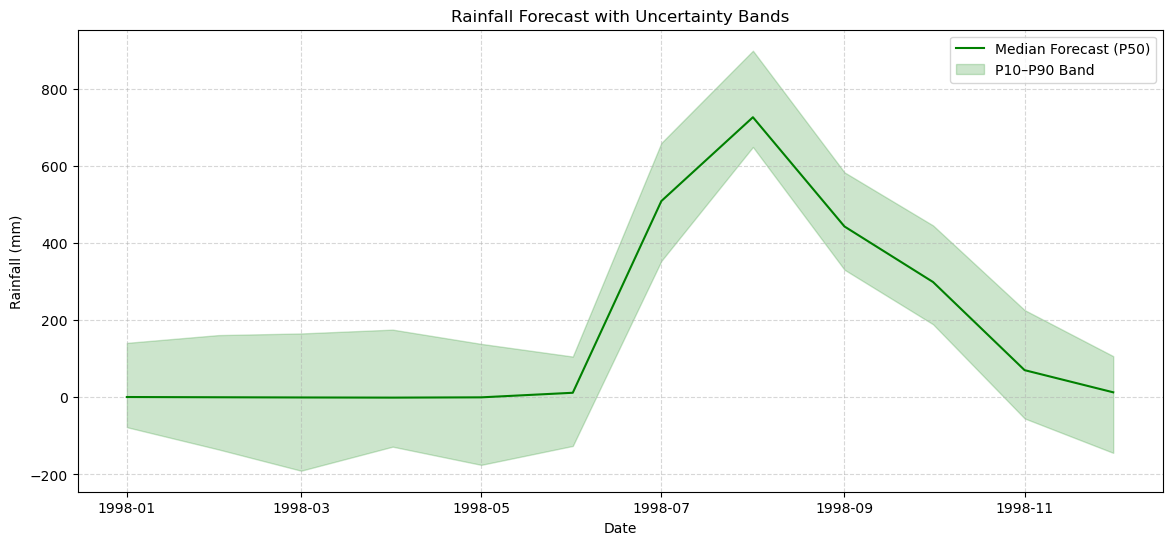

In [59]:
import matplotlib.pyplot as plt

# sims_df: DataFrame of bootstrap simulations (rows = forecast months, cols = simulation runs)

# --- Compute summary bands ---
forecast_summary = pd.DataFrame({
    "P50": sims_df.median(axis=1),        # median forecast
    "P10": sims_df.quantile(0.10, axis=1),# 10th percentile
    "P90": sims_df.quantile(0.90, axis=1) # 90th percentile
})

# --- Plot ---
plt.figure(figsize=(14,6))

# Median forecast line
plt.plot(forecast_summary.index, forecast_summary["P50"], 
         label="Median Forecast (P50)", color="green")

# Uncertainty band (P10–P90)
plt.fill_between(forecast_summary.index,
                 forecast_summary["P10"],
                 forecast_summary["P90"],
                 color="green", alpha=0.2, label="P10–P90 Band")

# (Optional) Overlay actuals if you have them
# plt.plot(test.index, test["Rainfall"], label="Test (Actual)", color="black")

plt.title("Rainfall Forecast with Uncertainty Bands")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Executive Summary

This project focuses on forecasting monthly rainfall for Mumbai using historical rainfall data and time-series analysis. After cleaning and transforming the month-wise dataset into a continuous monthly time series, multiple forecasting models were evaluated. Due to Mumbai’s strong monsoon seasonality, the Holt–Winters Additive Seasonal Model produced the most accurate results and provided reliable 12-month rainfall forecasts. The project includes a trained model, forecast visualizations, evaluation metrics, and a detailed report.

**Goals**

To build a reliable machine learning/time-series model that can forecast monthly rainfall for Mumbai.

To support water resource planning, reservoir management, and monsoon preparedness.

To generate insights into historical patterns and future rainfall trends.

# Results

The rainfall data shows a clear 12-month seasonal cycle dominated by monsoon (June–September).

Model comparison results:

Naive Model → High error

Seasonal-Naive → Moderate accuracy

Holt–Winters Additive Model → Lowest error (best performance)

The final Holt–Winters model produced a 12-month rainfall forecast that accurately reflects expected seasonal behavior.

Forecast includes a visualized uncertainty band for more realistic planning.


# Recommendation
Use the Holt–Winters Additive Seasonal Model for regular monthly rainfall forecasting.

Update the model every month when new rainfall data becomes available.

For improved accuracy in future versions:

Add climate indicators (ENSO, IOD, MJO).

Compare with SARIMA, Prophet, and XGBoost models.

Automate the data pipeline and forecasting process.


# Handover Note
This project is being handed over with all essential components required for continued maintenance and future enhancement. It includes the cleaned monthly rainfall dataset, the complete Jupyter Notebook containing all steps from data preprocessing to forecasting, the trained Holt–Winters model, all generated visualizations, and the comprehensive final report and presentation. To maintain and update the project, new monthly rainfall observations should be added to the dataset, after which the notebook can be re-run to automatically generate updated forecasts. It is recommended to periodically re-evaluate the model’s performance and compare it with alternative methods such as SARIMA, Prophet, and machine learning approaches as needed. The project structure is clear and documented so that future users can easily extend it—for example, by integrating climate indices or automating the forecasting pipeline. This handover ensures that the system remains functional, scalable, and ready for future improvements.